# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [33]:
income_data = pd.DataFrame({'TARGET':app_train['TARGET'], "Million_INCOME":app_train['AMT_INCOME_TOTAL']/10000})

In [34]:
income_data["equal_width_MI"] = pd.cut(income_data["Million_INCOME"], 10)
print(income_data)


        TARGET  Million_INCOME      equal_width_MI
0            1       20.250000  (-9.132, 1172.308]
1            0       27.000000  (-9.132, 1172.308]
2            0        6.750000  (-9.132, 1172.308]
3            0       13.500000  (-9.132, 1172.308]
4            0       12.150000  (-9.132, 1172.308]
5            0        9.900000  (-9.132, 1172.308]
6            0       17.100000  (-9.132, 1172.308]
7            0       36.000000  (-9.132, 1172.308]
8            0       11.250000  (-9.132, 1172.308]
9            0       13.500000  (-9.132, 1172.308]
10           0       11.250000  (-9.132, 1172.308]
11           0        3.841915  (-9.132, 1172.308]
12           0        6.750000  (-9.132, 1172.308]
13           0       22.500000  (-9.132, 1172.308]
14           0       18.900000  (-9.132, 1172.308]
15           0       15.750000  (-9.132, 1172.308]
16           0       10.800000  (-9.132, 1172.308]
17           0        8.100000  (-9.132, 1172.308]
18           0       11.250000 

In [35]:

income_data['equal_LS_MI'] = pd.cut(income_data['Million_INCOME'], bins = np.linspace(-9, 1200, num = 10))

income_groups  = income_data.groupby('equal_LS_MI').mean()
income_groups

,TARGET,Million_INCOME
equal_LS_MI,,
"(-9.0, 125.333]",0.080736,16.748737
"(125.333, 259.667]",0.060606,160.905368
"(259.667, 394.0]",0.111111,330.055850
"(394.0, 528.333]",0.000000,439.001190
"(528.333, 662.667]",NaN,NaN
"(662.667, 797.0]",0.000000,675.000000
"(797.0, 931.333]",0.000000,900.000000
"(931.333, 1065.667]",NaN,NaN
"(1065.667, 1200.0]",NaN,NaN


In [36]:
income_data['equal_LS_MI'] = pd.cut(income_data['Million_INCOME'], bins = np.linspace(-9, 600, num = 10))

income_groups  = income_data.groupby('equal_LS_MI').mean()
income_groups

,TARGET,Million_INCOME
equal_LS_MI,,
"(-9.0, 58.667]",0.080903,16.469900
"(58.667, 126.333]",0.046353,75.263950
"(126.333, 194.0]",0.068627,148.750950
"(194.0, 261.667]",0.000000,217.476468
"(261.667, 329.333]",0.250000,298.250662
"(329.333, 397.0]",0.000000,362.084325
"(397.0, 464.667]",0.000000,450.000000
"(464.667, 532.333]",NaN,NaN
"(532.333, 600.0]",NaN,NaN


In [42]:
income_data['equal_LS_MI'] = pd.cut(income_data['Million_INCOME'], bins = np.linspace(-9, 350, num = 10))

income_groups  = income_data.groupby('equal_LS_MI').mean()
income_groups

,TARGET,Million_INCOME
equal_LS_MI,,
"(-9.0, 30.889]",0.082401,14.951696
"(30.889, 70.778]",0.059613,38.711720
"(70.778, 110.667]",0.045726,84.092087
"(110.667, 150.556]",0.047945,123.106854
"(150.556, 190.444]",0.076923,169.384615
"(190.444, 230.333]",0.000000,215.316468
"(230.333, 270.222]",0.000000,258.750000
"(270.222, 310.111]",0.000000,293.002650
"(310.111, 350.0]",0.250000,326.250000


([<matplotlib.axis.XTick at 0x1240ff6d8>,
 <a list of 9 Text xticklabel objects>)

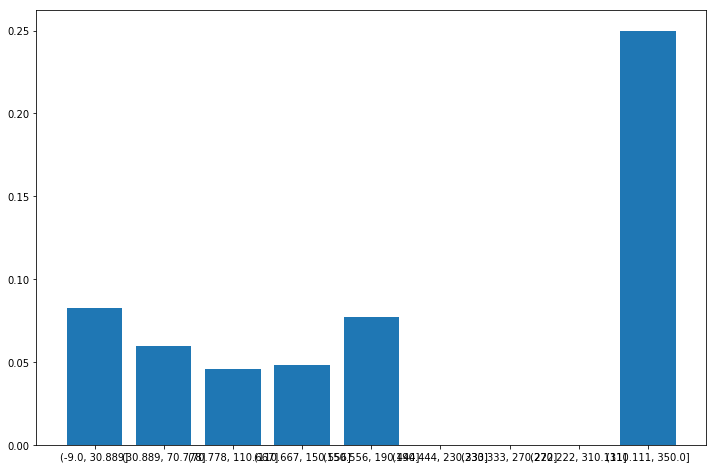

In [47]:
plt.figure(figsize = (12, 8))

plt.bar(range(len(income_groups.index)), income_groups['TARGET'])

plt.xticks(range(len(income_groups.index)), income_groups.index)